<a href="https://colab.research.google.com/github/TrunnMosby/GSoC-RedHenLabs-Aztec-Glyph-Detection/blob/main/Aztec_Glyph_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/Everything.zip"

In [ ]:
import cv2
import matplotlib.pyplot as plt
import  os
import numpy as np

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt


In [ ]:
base_models=tf.keras.applications.VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
base_models.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=base_models.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


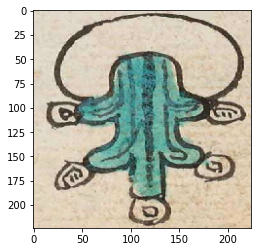

In [ ]:
img, x = load_image("/content/Everything/Ameyalco22r.jpeg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
predictions = base_models.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

predicted hook with probability 0.301
predicted nematode with probability 0.138
predicted ocarina with probability 0.049
predicted pick with probability 0.024
predicted plate_rack with probability 0.020


In [ ]:
feat_extractor = Model(inputs=base_models.input, outputs=base_models.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 134,260,544
Trainable params: 134,260,544
Non-trainable params: 0
_________________________________________________________________


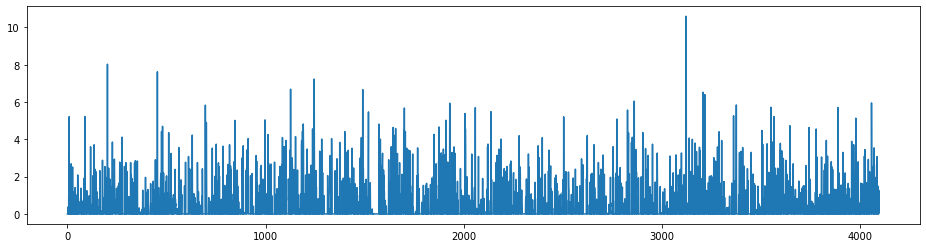

In [ ]:
img, x = load_image("/content/Everything/Acaxochitlan31r.jpeg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
images_path = '/content/Everything'
image_extensions = ['.jpg', '.png', '.jpeg']   
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 1261 images to analyze


In [ ]:
import time
tic = time.clock()
features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


analyzing image 0 / 1261. Time: 0.0019 seconds.
analyzing image 500 / 1261. Time: 542.4358 seconds.
analyzing image 1000 / 1261. Time: 543.5834 seconds.
finished extracting features for 1261 images


In [ ]:
loc1=r'/content/Everything'
loc2=os.listdir(loc1)
name=[]
for i in loc2:
    name.append(i.split('.')[0])
name=sorted(name,key=str.lower)

Text(0.5, 1.0, 'xiquipilli10v8000,bagFromXiquipilco.jpeg')

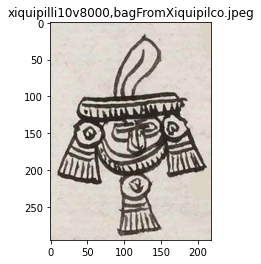

In [ ]:
import random
query_image_idx = int(len(images) * random.random())
img = image.load_img(images[query_image_idx])
plt.imshow(img)
plt.title(images[query_image_idx].split('/')[-1])

In [ ]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(features[query_image_idx], feat) for feat in features ]

In [ ]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

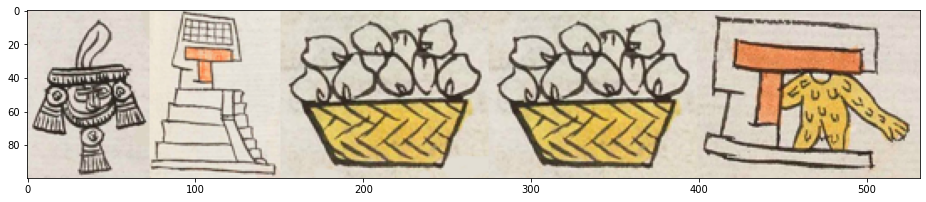

In [ ]:
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

# **RESULTS**
## **Note :-The set 'result images' shows the 5 most similar images to the 'query image' in descending order.**

In [ ]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(features[query_image_idx], feat) for feat in features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Names of the similar images:-
atl40rwaterFromAhuatzitzinco.jpg
atl50rwater(silent)FromTlapacoyan.jpg
ahuatl40voaktreeFromAhuatzitzinco.png
ahuatl21voaktreeFromAhuatepec.jpg
atl03vwaterFromAcolman.jpg


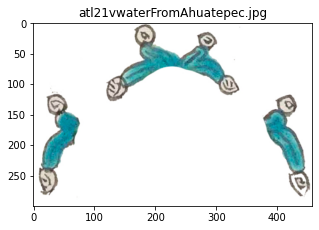

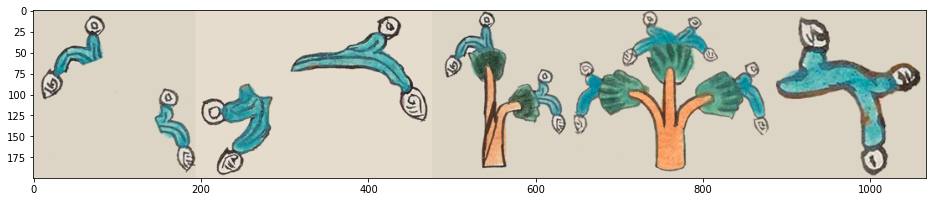

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images
xochitl23rflowerFromXochitepec.jpeg
oztotl42rcaveFromOztotlapechco.jpeg
xochitl10rflowerFromXochiacan.jpg
Ehecatl12rdeitynameFromEhecatepec.jpeg
oztotl37rcaveFromOztoma.jpeg


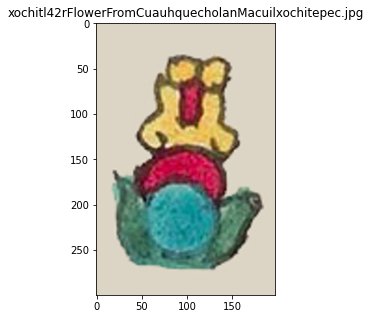

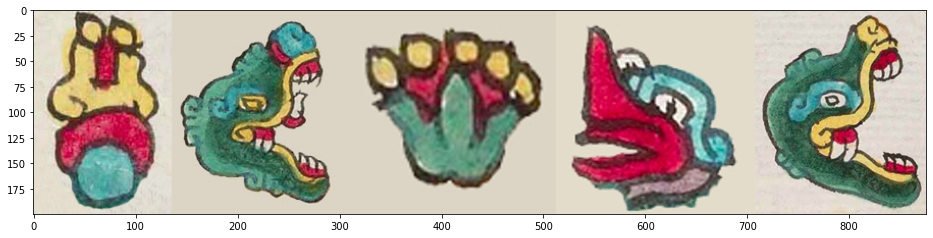

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images
tepetl32rhill,mountainFromCoatepec.jpg
Quimichtepec16rMouseMountain.jpeg
Tenexticpac10vTenextliIsCalLime.jpeg
Coatepec32r.jpeg
tepetl16r(silent)hill,mountainFromPipiyoltepec.jpeg


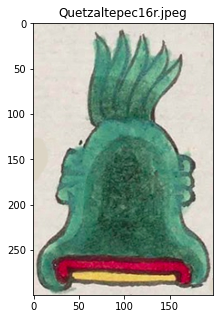

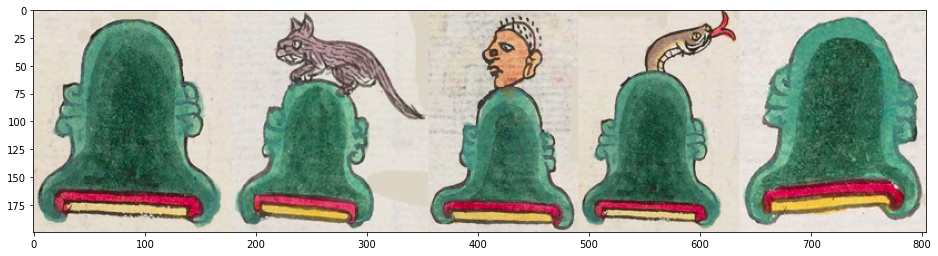

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images
Tamazolapan43r.jpeg
Atlan54r.png
Cuitlahuac2v.jpg
atl29rwaterFromTequixquiac.jpeg
atl04vwater(orapantliimpliedplace_)FromTequixquiac.jpg


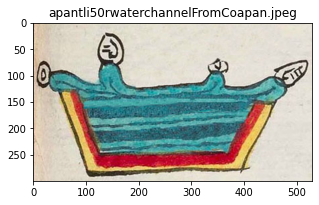

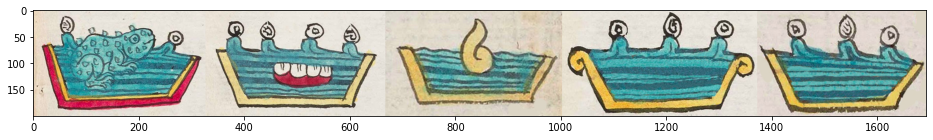

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images
apantli13vwaterchannelFromCoyolapan.jpeg
Cuitlahuac6r.jpeg
apantli08rwaterchannelFromAxocopan.png
Huitzitzilapan6r.jpeg
Tequixquiac4v.jpg


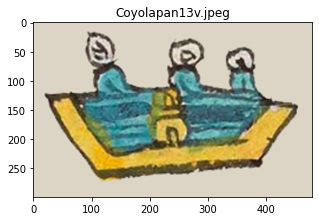

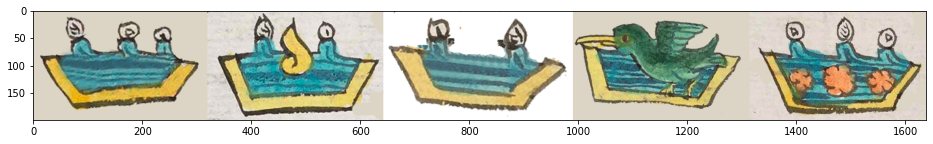

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images
Ohuapan37r.jpeg
amilli25rirrigatedfieldFromAmiltzinco.jpg
Atocpan29r.jpeg
cuahuitl13vtreeFromCuauhixayacatitlan.jpeg
acatl23rreedFromMiacatlan.jpeg


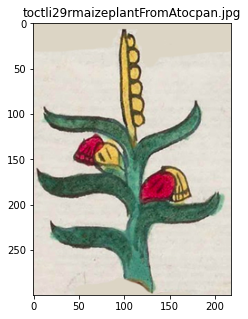

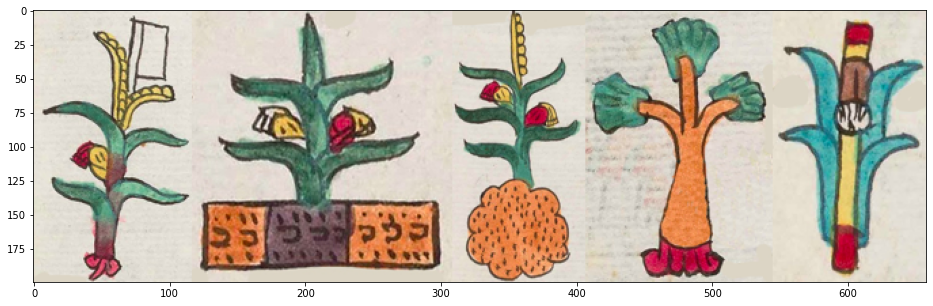

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images
maitl31rhand,armFromMichmaloyan.jpeg
maitl37rhand,arm(removebluebitinhand)FromAlahuiztlan.jpeg
Tetlapanaloyan29r.jpeg
tlapana29rsplitsomethingopen(verb)FromTetlapanaloyan.jpeg
maitl33rhand,arm.jpg


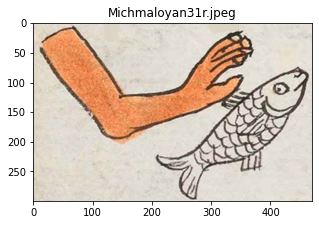

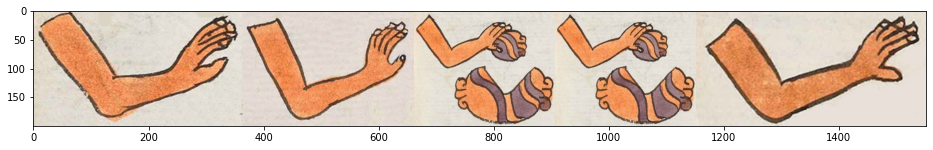

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images
xilotl31rtendermaizeearFromXilotepec.jpeg
xilotl8rtendermaizeearFromXilotepec.jpg
Xilotzinco26r.jpeg
xochitl24vflowersFromXochimilcatzinco.jpeg
Xochimilco6r.jpeg


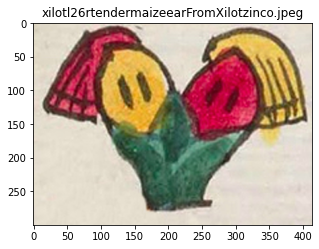

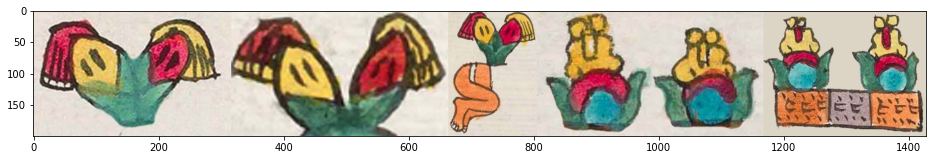

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Ocotepec32r.jpeg
Tezcatepec27r.jpeg
Cenpohuallan21v.jpeg
tepetl21v(silent)FromCenpohuallan.jpg
Tenexticpac10vTenextliIsCalLime.jpeg


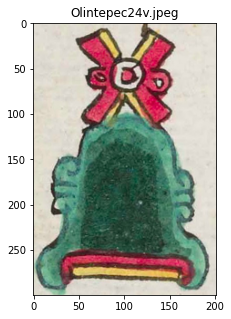

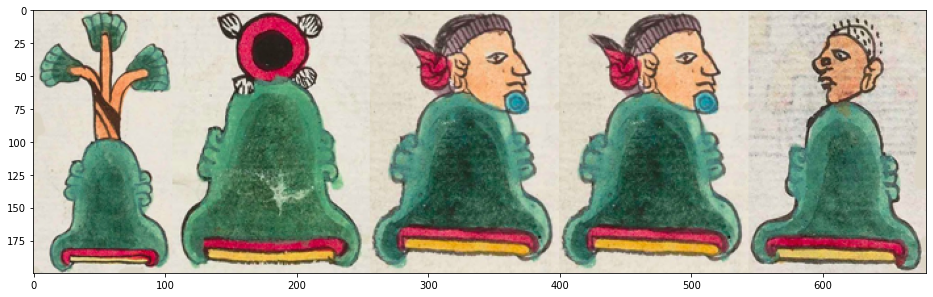

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
iztac13vFromIztactlalocan.jpg
tepetl13v(silent)hill,mountainFromIztactlalocan.jpeg
iztac15vwhiteFromIztactlalocan.png
yahualli22rsomethingroundFromCalyahualco.jpg
Iztactlalocan13v.jpeg


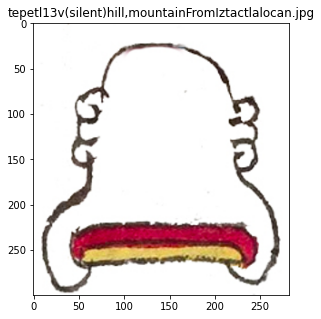

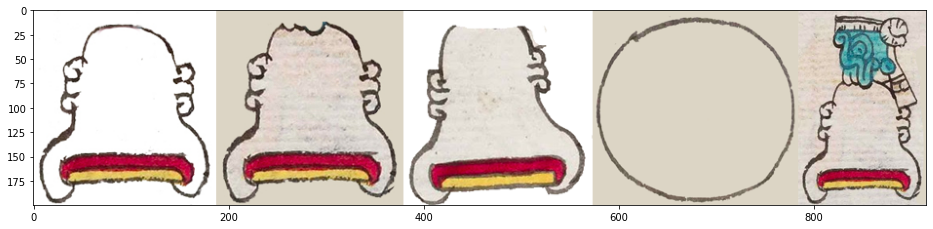

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
atl28rWaterFromXalac.jpeg
Xalapan26r.jpeg
atl26rwaterFromXalapan.jpeg
Ichcaatoyac40r.png
cilin12rsmallshellsSIMPLEXfwithCilan.jpeg


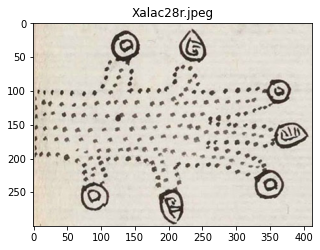

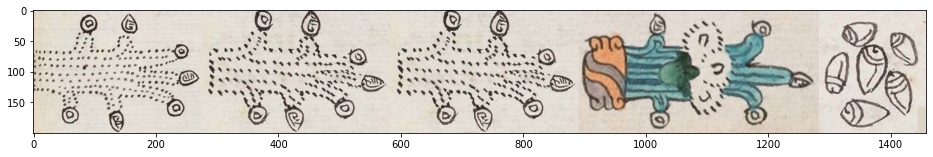

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
atl42rwaterFromQuecholac.jpeg
atl27rwaterFromAtenco.jpg
Cuitlahuac2v.jpg
apantli32rwaterchannelFromHuitzitzilapan.jpeg
apantli20rwaterchannelFromTecoloapan.jpeg


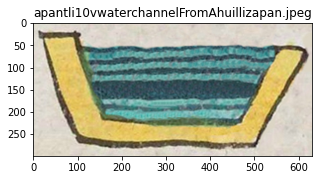

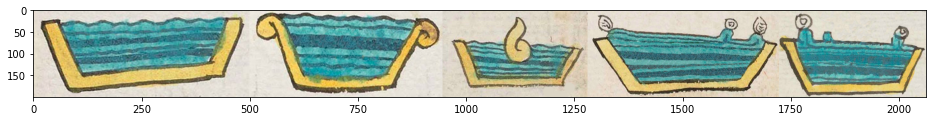

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
tlantli44rteeth,placeFromCamotlan.jpg
tlantli40rteeth,placeFromCuauhtecomatlan.png
teopan08rtempleFromQuiyauhteopan.jpeg
maxtlatl13rloincloth.jpg
coyolli44rBellFromCoyolapan.jpg


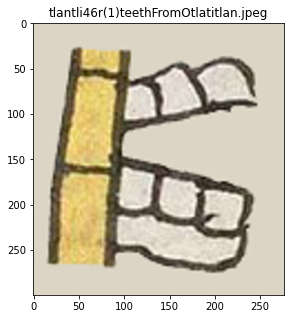

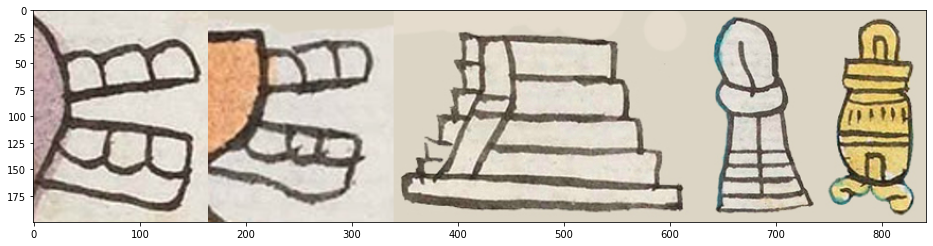

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Piaztlan15v.jpeg
Piaztlan15vSIMPLEX.jpeg
ChalcoAtenco17v.jpeg
Cuauhtitlan5v.jpg
atl37rwaterFromAtenanco.jpg


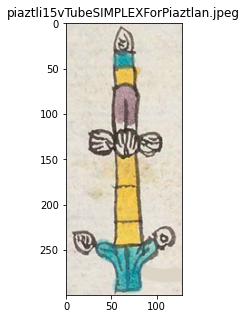

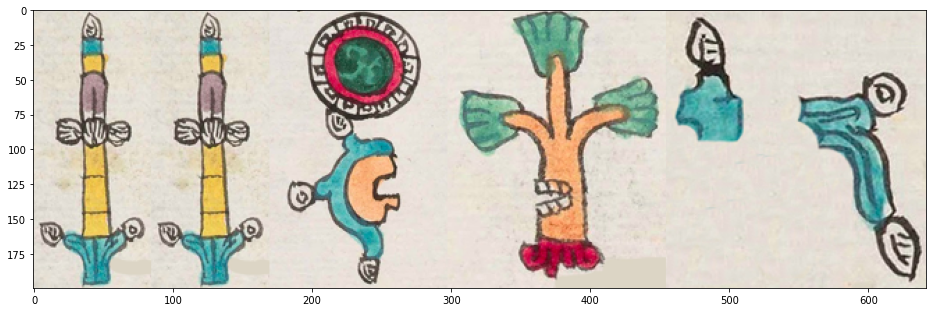

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Ehecatl12rdeitynameFromEhecatepec.jpeg
tlantli10vteeth,placeFromMatlatlan.jpg
oztotl42rcaveFromOztotlapechco.jpeg
totolin7vturkeyhenFromTotolapan.jpg
cuezalin10vredmacawtail_wingfeathersCuezaloztoc.jpeg


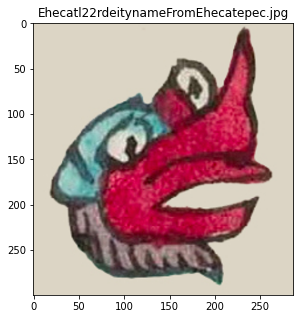

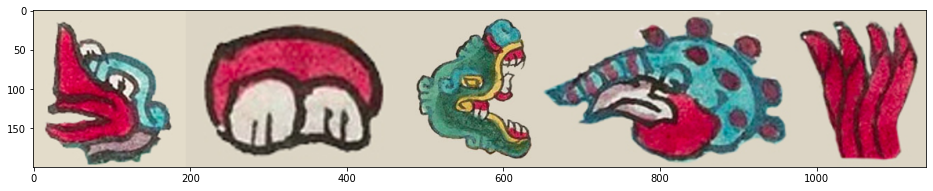

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Chontalcoatlan8rGloss.png
Hueiapan30rGloss.png
Hueiapan16rGloss.png
HueiAtotonilco8rGloss.png
Mixtlan10vGloss.png


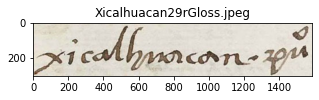

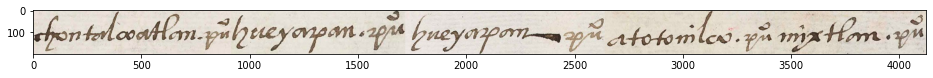

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
atl17vwaterFromChalcoAtenco.jpeg
atl24vwaterFromAyoxochapan.jpg
atl23rwaterFromAtlicholoayan.jpg
atl44rwaterFromTeocuitlatlan.jpeg
atl37rwaterFromAlahuiztlan.jpeg


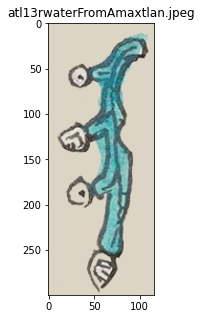

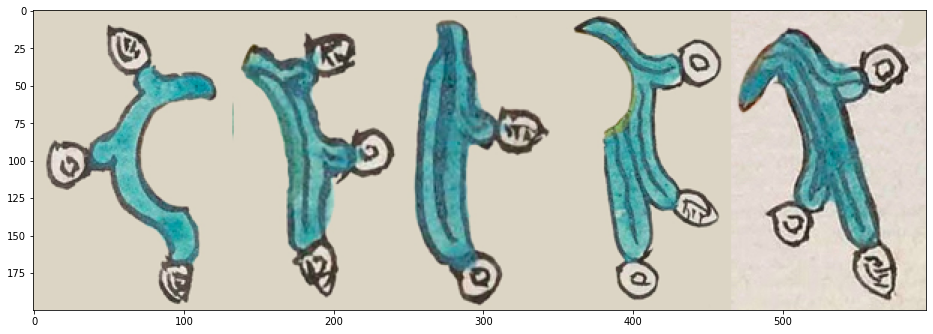

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
coatl17vserpent,snakeFromCoatitlan.jpg
Coatlan23r.jpeg
coatl08rserpent,snakeFromChontalcoatlan.jpeg
coatl23rserpent,snakeFromCoatlan.jpg
coatl42rserpent,snakeFromCoatzinco.jpeg


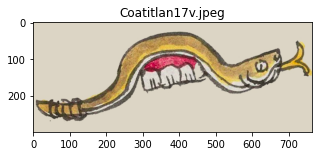

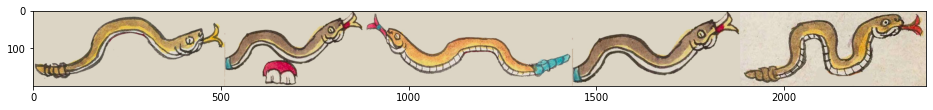

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
Xolocchiuhyan13rNEW.jpeg
xolotl13roldmanFromXolocchiuhyan.jpg
xolochtic13rwrinkledFromXolochiuhyan.png
huehue42roldmanSAforHuehuetlan.jpeg
huehue47roldmanFromHuehuetlan.jpg


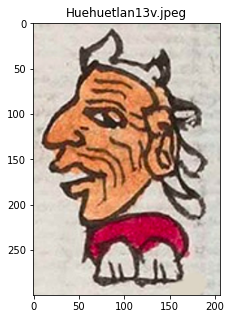

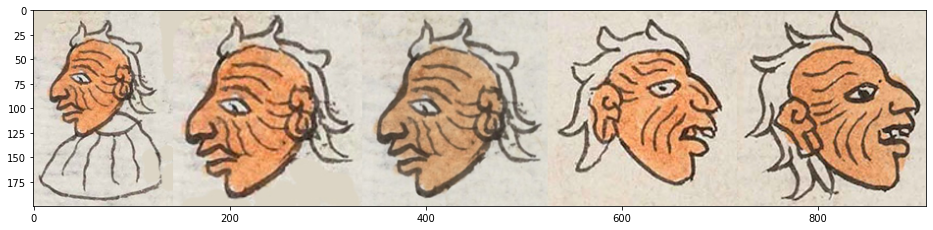

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
tlantli37rteeth,placeFromCuezalan.jpg
tlantli13vteeth,placeFromMazatlan.jpg
tlantli44rteeth,placeFromCuatzontepec.jpg
tlantli46rteeth(place)FromChinantlan.jpeg
tlantli13vteeth,placeFromCuauhtlan.jpg


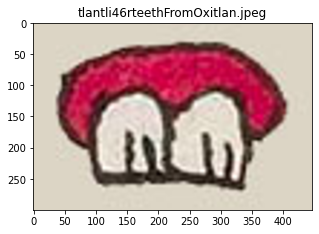

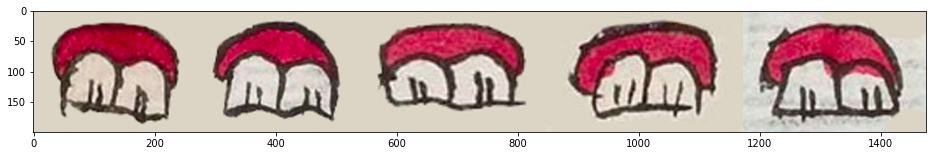

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
chantli49rhomeFromOxichan.jpeg
calli40rhouse,buildingFromEhuacalco.jpeg
calli20rhouse,buildingFromTepetlacalco.jpeg
calli20v(silent)house,buildingFromTlazoxiuhco.jpg
calli20v(silentlocative)HouseFromTezcacoac.jpeg


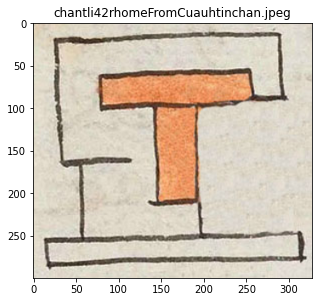

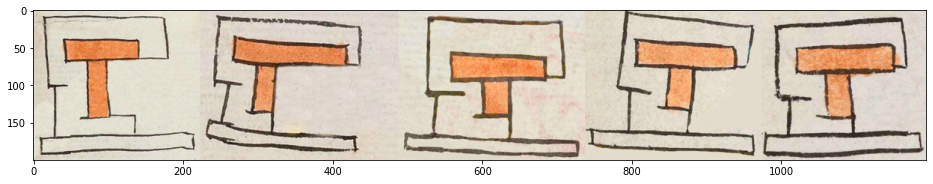

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

Names of the similar images:-
tepetl07vhill,mountainFromMamalhuaztepec.jpeg
tepetl42rFromCuauhquecholanMacuilxochitepec.jpg
tepetl21vhill,mountainFromAhuatepec.jpg
tepetl16rhill,mountainFromCentzontepec.jpg
tepetl16vhill,mountainFromAtepec.jpeg


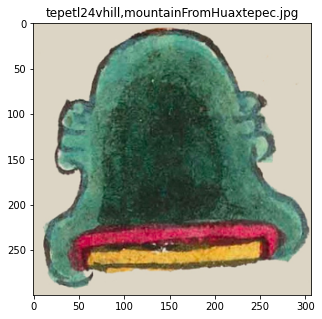

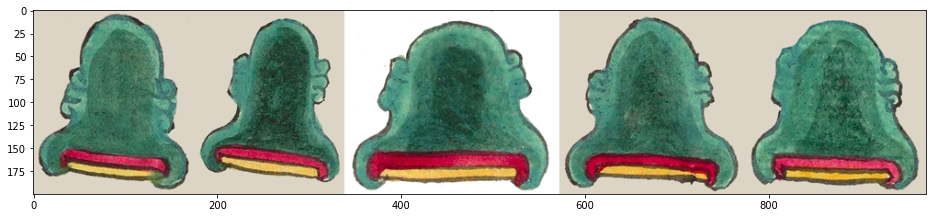

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title(images[query_image_idx].split('/')[-1])
plt.figure(figsize = (16,12))
plt.imshow(results_image)
print('Names of the similar images:-')
for i in idx_closest:
  print(images[i].split('/')[-1])

# **The set 'result images' shows the 5 most similar images to the 'query image' in descending order.**